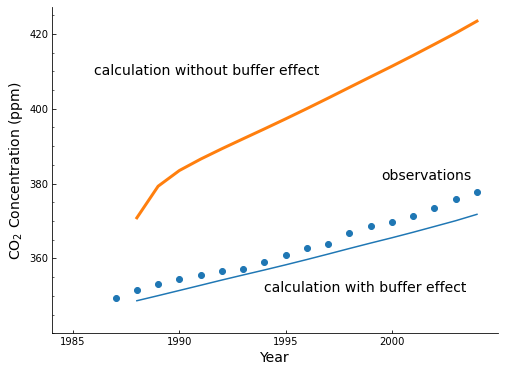

In [2]:
#coding=utf8

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy.integrate import odeint

def Modeling_of_carbon_cycle(file):
    df = pd.read_csv(file, header=0, skiprows=[1], usecols=[0, 1], names=['Year', 'Total'])
    gam = df[(df['Year'] >= 1987) & (df['Year'] <= 2004)].loc[:, 'Total'] / 2130
    return gam

def STBM(N, t, k, gam, ksi):
    '''

    :param N: [N1, N2]
    :param t: time parameters
    :param k: [k12, k21, N0]
    :return:
    '''
    gam = gam[int(t) + 236]
    #判断是否带buffer
    if ksi:
        ksi = 3.69 + N[0] * (0.0186 - 1.8 * (1e-6) * N[0])
        Buffer = [-k[0] * N[0] + k[1] * (k[2] + ksi * (N[1] - k[2])) + gam,
                  k[0] * N[0] - k[1] * (k[2] + ksi * (N[1] - k[2]))]
        return Buffer
    else:

        noBuffer = [-k[0]*N[0] + k[1]*N[1] + gam, k[0]*N[0] - k[1]*N[1]]
        return noBuffer

def plots(annualFile, noBuffer, Buffer):
    df = pd.read_csv(annualFile, usecols=[0, 1], comment="#")
    obs =  df[(df['year'] >= 1987) & (df['year'] <= 2004)]
    x = obs.loc[:, 'year']
    y = obs.loc[:, 'mean']
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y)
    plt.plot(x[1:], noBuffer[1:, 0])
    plt.plot(x[1:], Buffer[1:, 0], linewidth=3)

    #设置坐标轴刻度朝向
    plt.tick_params(direction="in", which='both')

    #设置坐标轴刻度值范围
    plt.yticks(np.arange(360, 440, step=20))
    plt.ylim(ymin=340)
    plt.xticks(np.arange(1985, 2004, step=5))
    plt.xlim(xmin=1984, xmax=2005)

    #设置坐标轴标题
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("CO$_2$ Concentration (ppm)", fontsize=14)
    ax = plt.gca()
    
    #设置次刻度
    ax.yaxis.set_minor_locator(mticker.MultipleLocator(5))
    
    #设置上方和右方图框为不可见
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    #设置标注
    ax.annotate('observations', (1999.5, 381), fontsize=14)
    ax.annotate('calculation without buffer effect', (1986, 409), fontsize=14)
    ax.annotate('calculation with buffer effect', (1994, 351), fontsize=14)
    plt.show()
    plt.close()


if __name__=="__main__":
    file = os.path.join(os.getcwd(), "global_1751_2008.csv")
    gam = Modeling_of_carbon_cycle(file)
    N = [740/2.13, 900/2.13]
    k = (105/740, 102/900, 821/2.13)
    t = np.arange(18)
    ksi = False
    noBuffer = odeint(STBM, N, t, args=(k, gam, ksi))
    ksi = True
    Buffer = odeint(STBM, N, t, args=(k, gam, ksi))
    annualFile = os.path.join(os.getcwd(), "co2_annmean_mlo.csv")
    plots(annualFile, noBuffer, Buffer)